## 8.1 주가지수

In [1]:
import pandas as pd

In [194]:
df_13 = pd.read_excel('data/20210913.xlsx', index_col=0)
df_14 = pd.read_excel('data/20210914.xlsx', index_col=0)

In [195]:
df_13.head()

,종목명,종가,대비,등락률,시가,고가,저가,거래량,거래대금,시가총액,상장주식수
종목코드,,,,,,,,,,,
095570,AJ네트웍스,5830,-130,-2.18,5980,5980,5800,133188,780734220,272973979850,46822295
006840,AK홀딩스,27150,0,0.00,27000,27200,26250,21725,581595350,359671281150,13247561
027410,BGF,6250,-70,-1.11,6270,6350,6230,105306,661320960,598229943750,95716791
282330,BGF리테일,179000,-2000,-1.10,183000,183500,177500,23213,4178520500,3093819174000,17283906
138930,BNK금융지주,7970,50,0.63,7920,7970,7890,839034,6661342020,2597703910620,325935246


In [256]:
df_13 = df_13[df_13['시가'] != 0]
df_14 = df_14[df_14['시가'] != 0]

In [264]:
idx = df_14.index.difference(df_13.index)
print(idx)
print(df_14.loc[idx[0], '종목명'])

Index(['395400'], dtype='object', name='종목코드')
SK리츠


In [258]:
전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액']) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0067170373639553


In [268]:
intersect_idx = df_14.index.intersection(df_13.index)
t_13 = df_13.loc[intersect_idx]
t_14 = df_14.loc[intersect_idx]
cond = t_13['상장주식수'] != t_14['상장주식수']
print(cond.all())

False


In [272]:
t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']

종목코드
001570    499996
011930      5661
Name: 상장주식수, dtype: int64

In [273]:
주식수증가액 = (t_14.loc[cond, '상장주식수'] - t_13.loc[cond, '상장주식수']) * t_13.loc[cond, '종가']

전일비교시가총액 = df_13['시가총액'].sum()
전일기준시가총액 = df_13['시가총액'].sum()
증감률 = (전일비교시가총액 + df_14.loc[idx[0], '시가총액'] + 주식수증가액.sum()) / 전일비교시가총액
당일기준시가총액 = 증감률 * 전일기준시가총액
당일비교시가총액 = df_14['시가총액'].sum()
print(당일비교시가총액 / 당일기준시가총액)

1.0067159326297976


## 8.2 코스피와 삼성전자

In [278]:
import pandas as pd
df = pd.read_excel('data/20210914.xlsx', index_col=0)
df = df[['종목명', '종가', '시가총액']]
df.head()

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220


In [291]:
df = pd.read_excel('data/20210914.xlsx', index_col=0, usecols=[0, 1, 2, 10])
df.head()

,종목명,종가,시가총액
종목코드,,,
095570,AJ네트웍스,6000,280933770000
006840,AK홀딩스,27700,366957439700
027410,BGF,6260,599187111660
282330,BGF리테일,179000,3093819174000
138930,BNK금융지주,8070,2630297435220


In [296]:
df['비중'] = df['시가총액'] / df['시가총액'].sum() * 100
df.sort_values('시가총액', ascending=False).head()

,종목명,종가,시가총액,비중
종목코드,,,,
005930,삼성전자,76600,457285343330000,20.054103
000660,SK하이닉스,107500,78260254237500,3.432078
035420,NAVER,402500,66116016487500,2.899497
207940,삼성바이오로직스,913000,60408645000000,2.649202
005935,삼성전자우,71400,58754110380000,2.576643


In [315]:
import numpy as np

kospi = pd.read_excel("data/kospi.xlsx")
samsung = pd.read_excel("data/samsung.xlsx")

data = [ kospi['종가'], samsung['종가'] ]
df = pd.concat(data, axis=1, keys=["kospi", "samsung"])
df.head()

,kospi,samsung
0,3199.27,76700
1,3144.19,74600
2,3133.90,74300
3,3128.53,74600
4,3146.81,75700


<AxesSubplot:xlabel='samsung', ylabel='kospi'>

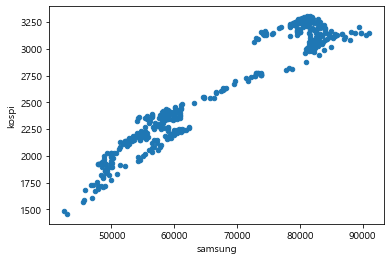

In [317]:
df.plot.scatter(x='samsung', y='kospi')

In [318]:
df.corr()

,kospi,samsung
kospi,1.000000,0.966597
samsung,0.966597,1.000000


## 8.3 코스피 통계

In [2]:
import pandas as pd 

kospi = pd.read_excel("data/kospi.xlsx", index_col=0, parse_dates=True)
kospi.head()

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-08-31,3199.27,55.08,1.75,3144.49,3199.89,3130.30,661221,15863630,2309062613
2021-08-30,3144.19,10.29,0.33,3160.87,3164.87,3132.77,602858,11758710,2269580866
2021-08-27,3133.90,5.37,0.17,3116.29,3143.01,3106.97,520669,11039934,2262422712
2021-08-26,3128.53,-18.28,-0.58,3151.30,3159.37,3121.04,727719,13335288,2259280094
2021-08-25,3146.81,8.51,0.27,3148.13,3161.00,3124.25,624688,13365596,2272311235


In [3]:
print(kospi['종가'].max())
print(kospi['종가'].min())

3305.21
1457.64


In [4]:
cond = kospi['종가'] == kospi['종가'].max()
kospi.loc[cond]

,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
일자,,,,,,,,,
2021-07-06,3305.21,12.0,0.36,3295.44,3313.51,3295.44,1029465,14686383,2314417370


In [5]:
print(kospi.loc[cond].index)
print(kospi.loc[cond].index[0])

DatetimeIndex(['2021-07-06'], dtype='datetime64[ns]', name='일자', freq=None)
2021-07-06 00:00:00


In [6]:
print(kospi['종가'].idxmax())
print(kospi['종가'].idxmin())

2021-07-06 00:00:00
2020-03-19 00:00:00


In [7]:
kospi = pd.read_excel("data/kospi.xlsx", index_col=0, usecols=[0, 1])
kospi["변동폭"] = kospi["종가"] - kospi["종가"].shift(1)
kospi.sort_values('변동폭').iloc[:5]

,종가,변동폭
일자,,
2020/03/23,1482.46,-127.51
2021/01/07,3031.68,-120.50
2020/03/19,1457.64,-108.51
2020/06/15,2030.82,-107.23
2021/02/24,2994.98,-104.71


In [8]:
kospi.sort_values('변동폭', ascending=False).iloc[:5]

,종가,변동폭
일자,,
2020/03/18,1591.20,133.56
2020/06/12,2132.30,101.48
2021/01/28,3069.05,92.84
2021/02/25,3099.69,86.74
2020/08/19,2360.54,86.32


In [9]:
print(kospi["변동폭"].nlargest(n=5))
print(kospi["변동폭"].nsmallest(n=5))

일자
2020/03/18    133.56
2020/06/12    101.48
2021/01/28     92.84
2021/02/25     86.74
2020/08/19     86.32
Name: 변동폭, dtype: float64
일자
2020/03/23   -127.51
2021/01/07   -120.50
2020/03/19   -108.51
2020/06/15   -107.23
2021/02/24   -104.71
Name: 변동폭, dtype: float64


In [10]:
kospi = pd.read_excel("data/kospi.xlsx", usecols=[0, 1, 4, 5, 6, 7], parse_dates=[0])
how = {
    '시가' : 'first',
    '고가' : max,
    '저가' : min,
    '종가' : 'last',
    '거래량' : sum
}
df = kospi.groupby( pd.Grouper(key='일자', freq='m') ).agg(how)
df.head()

,시가,고가,저가,종가,거래량
일자,,,,,
2020-01-31,2201.21,2277.23,2119.01,2119.01,13096068
2020-02-29,2086.61,2255.49,1980.82,1987.01,13959766
2020-03-31,1997.03,2089.08,1439.43,1754.64,17091025
2020-04-30,1737.28,1957.51,1664.13,1947.56,21045123
2020-05-31,1906.42,2054.52,1894.29,2029.60,16206497


In [11]:
kospi = pd.read_excel("data/kospi.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()

threshold = 2300
cond = kospi['종가'] >= threshold
print(kospi.loc[cond, '종가'].iloc[0])
print(kospi.loc[cond, '종가'].index[0])

2311.86
2020-08-05 00:00:00


In [12]:
for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] >= threshold
    print(threshold, kospi.loc[cond, '종가'].iloc[0], kospi.loc[cond, '종가'].index[0])

2300 2311.86 2020-08-05 00:00:00
2400 2418.67 2020-08-11 00:00:00
2500 2543.03 2020-11-16 00:00:00
2600 2602.59 2020-11-23 00:00:00
2700 2731.45 2020-12-04 00:00:00
2800 2806.86 2020-12-24 00:00:00
2900 2944.45 2021-01-04 00:00:00
3000 3031.68 2021-01-07 00:00:00


In [13]:
data = [ ]
for threshold in range(2300, 3100, 100):
    cond = kospi['종가'] > threshold
    data.append( (f'{threshold} 포인트 돌파', kospi.index[cond][0], kospi.loc[cond, '종가'].iloc[0]) )

df = pd.DataFrame(data, columns=['이벤트', '일자', '지수'])
df

,이벤트,일자,지수
0,2300 포인트 돌파,2020-08-05,2311.86
1,2400 포인트 돌파,2020-08-11,2418.67
2,2500 포인트 돌파,2020-11-16,2543.03
3,2600 포인트 돌파,2020-11-23,2602.59
4,2700 포인트 돌파,2020-12-04,2731.45
5,2800 포인트 돌파,2020-12-24,2806.86
6,2900 포인트 돌파,2021-01-04,2944.45
7,3000 포인트 돌파,2021-01-07,3031.68


## 8.4 시장수익률

In [1]:
import pandas as pd
kospi = pd.read_excel("data/kospi.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
kospi = kospi.sort_index()
수익률 = kospi.iloc[-1, 0]/kospi.iloc[0, 0]
print( (수익률 - 1) * 100 )

47.081377547502036


C:\Users\jongh\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [2]:
diff = (kospi.index[-1] - kospi.index[0])
투자기간 = diff.days / 365
cagr = 수익률 ** (1/투자기간) -1
print(cagr * 100)

26.111719470122587


In [3]:
ss = pd.read_excel("data/samsung.xlsx", usecols=[0, 1], index_col=0, parse_dates=True)
ss = ss.sort_index()
수익률 = ss.iloc[-1, 0]/ss.iloc[0, 0]
diff = (ss.index[-1] - ss.index[0])
투자기간 = diff.days / 365
cagr = 수익률 ** (1/투자기간) -1
print(cagr * 100)

21.871470174981077


<AxesSubplot:>

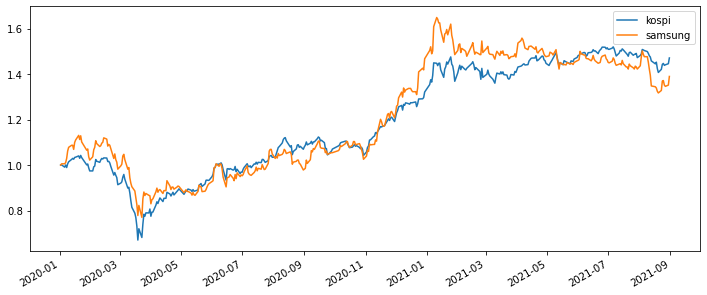

In [6]:
kospi_return = kospi['종가']/kospi.iloc[0, 0]
ss_return = ss['종가']/ss.iloc[0, 0]

df = pd.concat([kospi_return, ss_return], axis=1, keys=["kospi", "samsung"])
df.index.name = ''
df.plot(figsize=(12, 5))

## 8.5 Maximum Drawdown

In [7]:
import pandas as pd

kospi = pd.read_excel("data/kospi2000.xlsx", index_col=0)
kospi['전고점'] = kospi['Close'].cummax()
kospi['DD'] = (1 - kospi['Close'] / kospi['전고점']) * 100
kospi.head()

,Close,Open,High,Low,Volume,Change,전고점,DD
Date,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,195900000.0,0.0301,1059.04,0.000000
2000-01-05,986.31,1006.87,1026.52,984.05,257700000.0,-0.0687,1059.04,6.867540
2000-01-06,960.79,1013.95,1014.90,953.50,203520000.0,-0.0259,1059.04,9.277270
2000-01-07,948.65,949.17,970.16,930.84,215660000.0,-0.0126,1059.04,10.423591
2000-01-10,987.24,979.67,994.94,965.02,240180000.0,0.0407,1059.04,6.779725


In [8]:
MDD = kospi['DD'].max()
print(MDD)

55.73727149116181


In [9]:
조건 = kospi["DD"] == MDD
kospi[조건]

,Close,Open,High,Low,Volume,Change,전고점,DD
Date,,,,,,,,
2001-09-17,468.76,475.31,476.42,464.39,732190000.0,-0.0281,1059.04,55.737271


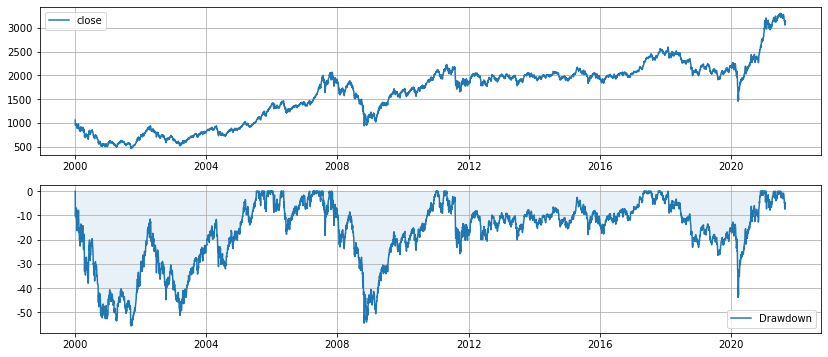

In [10]:
import matplotlib.pyplot as plt 
    
plt.rc("axes", unicode_minus=False)   # y축 음수처리

fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(kospi.index, kospi["Close"], label="close")
ax2.plot(kospi.index, kospi["DD"] * -1, label="Drawdown")
ax2.fill_between(kospi.index, kospi["DD"] * -1, alpha=0.1) # 색상채우기

ax1.grid()
ax2.grid()

ax1.legend(loc='best')
ax2.legend(loc='best')
plt.show()

,Close,Open,High,Low,Volume
2024-01-01,100.496714,100.496714,100.916198,99.697955,267900.0
2024-01-02,100.357763,100.496714,100.719925,99.853328,450600.0
2024-01-03,101.007769,100.357763,101.128842,99.778795,199600.0
2024-01-04,102.546147,101.007769,102.892359,100.510288,415700.0
2024-01-05,102.306032,102.546147,103.513065,102.106287,374400.0
...,...,...,...,...,...
2024-05-13,89.470353,90.799213,91.020754,88.810154,497400.0
2024-05-14,89.735293,89.470353,90.608427,88.974371,426700.0
2024-05-15,89.969552,89.735293,90.323220,89.186364,182500.0
2024-05-16,89.974152,89.969552,90.776764,89.592039,457200.0


C:\Users\edukd\AppData\Local\Temp\ipykernel_21312\1237093186.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  price_index = (df["Close"] / df["Close"][0]) * 100


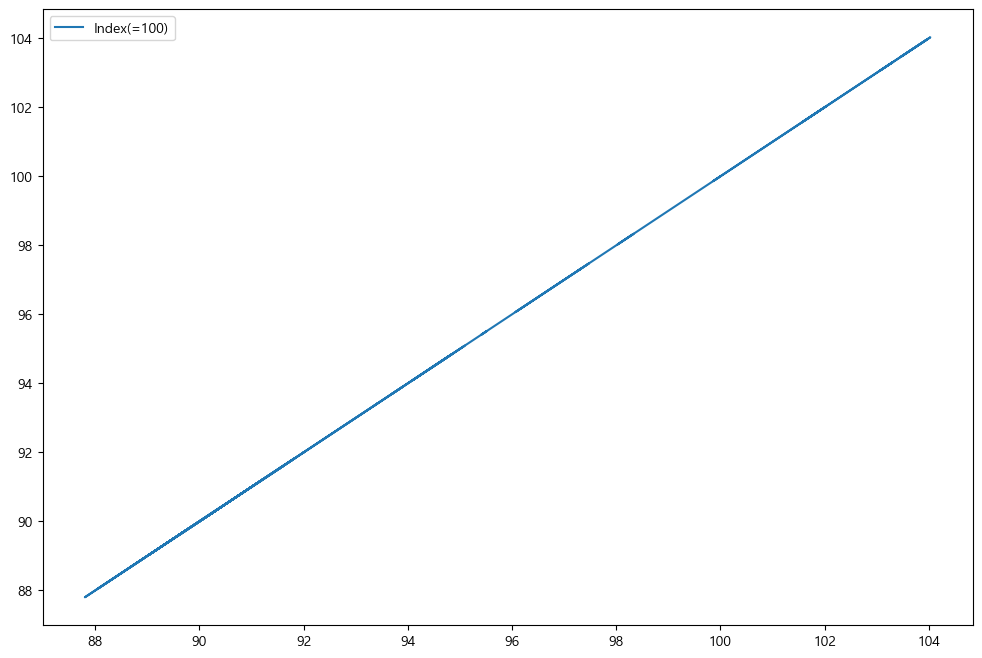

C:\Users\edukd\AppData\Local\Temp\ipykernel_21312\1237093186.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_index = (df['Close']/df['Close'][0])*100


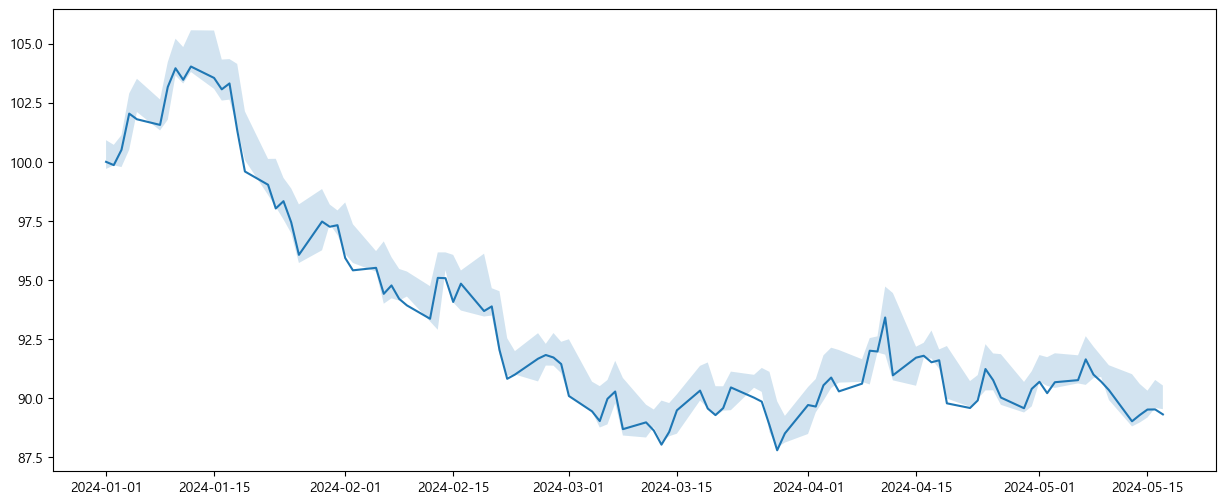

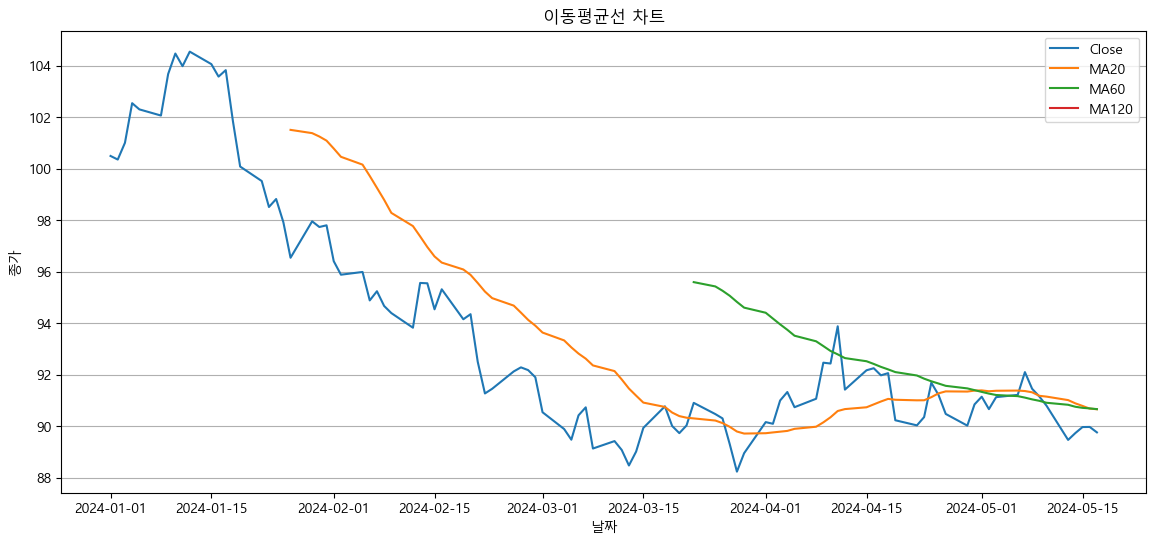

          category
category          
보합               1
상승              45
하락              54


<Axes: title={'center': '상승/보합/하락 차트'}, xlabel='category'>

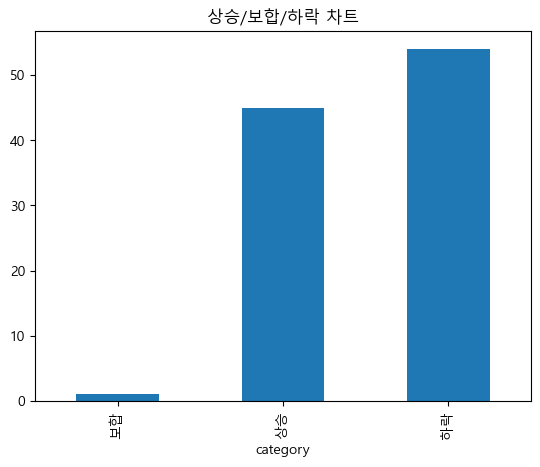

In [5]:
# =========================================
# 0) 준비
# =========================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

# 재현 가능 난수
np.random.seed(42)

# 샘플 “가격” 데이터 (영업일 100개)
dates = pd.date_range("2024-01-01", periods=100, freq="B")
price = 100 * (1 + np.random.normal(0, 0.01, size=len(dates))).cumprod()
df = pd.DataFrame({"Close": price}, index=dates)
df["Open"]  = df["Close"].shift(1).fillna(df["Close"].iloc[0])
df["High"]  = df[["Open","Close"]].max(axis=1) * (1 + np.random.uniform(0, 0.01, len(df)))
df["Low"]   = df[["Open","Close"]].min(axis=1) * (1 - np.random.uniform(0, 0.01, len(df)))
df["Volume"]= (np.random.randint(1000, 5000, len(df))*100).astype(float)
display(df)
# =========================================
# 7.5 지수화(Indexing = 100 기준)
# =========================================
# TODO 7.5-1) Close를 100 기준 지수화(series / 첫값 * 100) 해서 라인차트로 표시
price_index = (df["Close"] / df["Close"][0]) * 100
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1)
ax.plot(price_index, price_index, label="Index(=100)")
plt.legend()
plt.show()

# =========================================
# 7.6 (선택) 캔들차트 — 외부패키지 없이 대체 시각화
#   * mplfinance 미사용: Open/High/Low/Close 중 Close만 라인 + 고가/저가 영역대(fill_between)로 대체
# =========================================
# TODO 7.6-1) Close 라인 + (Low~High) 범위를 반투명 영역으로 표현
df_index = (df['Close']/df['Close'][0])*100
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df.index, df_index)
ax.fill_between(df.index, df["Low"], df["High"], alpha=0.2)  # 범위 음영
plt.show()

# =========================================
# 7.7 이동평균선
# =========================================
# TODO 7.7-1) MA20, MA60, MA120 이동평균 열 추가 후 라인차트에 함께 표시
df['MA20'] = df["Close"].rolling(window=20).mean()
df['MA60'] = df["Close"].rolling(window=60).mean()
df['MA120'] = df["Close"].rolling(window=120).mean()
fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(1,1,1)
ax.plot(df['Close'],label='Close')
ax.plot(df['MA20'],label='MA20')
ax.plot(df['MA60'],label='MA60')
ax.plot(df['MA120'],label='MA120')
ax.set_xlabel('날짜')
ax.set_ylabel('종가')
ax.set_title('이동평균선 차트')
ax.legend(loc='best')
plt.grid(True,axis='y')
plt.show()

# =========================================
# 7.8 DataFrame과 시각화(카테고리 파생 + 집계)
# =========================================
# TODO 7.8-1) “상승/보합/하락” 카테고리 생성:
#   상승: Open < Close, 보합: Open == Close, 하락: Open > Close
#   그런 다음 카테고리별 개수를 groupby로 집계하고 막대차트로 표시
upward = df['Open']<df['Close']
stationary = df['Open']==df['Close']
downward = df['Open']>df['Close']
df.loc[upward,'category']='상승'
df.loc[stationary,'category']='보합'
df.loc[downward,'category']='하락'
how={'category':len}
data=df.groupby('category').agg(how)
print(data)
data.plot.bar(title='상승/보합/하락 차트', legend=False)

c:\Users\edukd\miniconda3\envs\kiwoom-venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
c:\Users\edukd\miniconda3\envs\kiwoom-venv\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<Axes: xlabel='kiwoom', ylabel='kospi'>

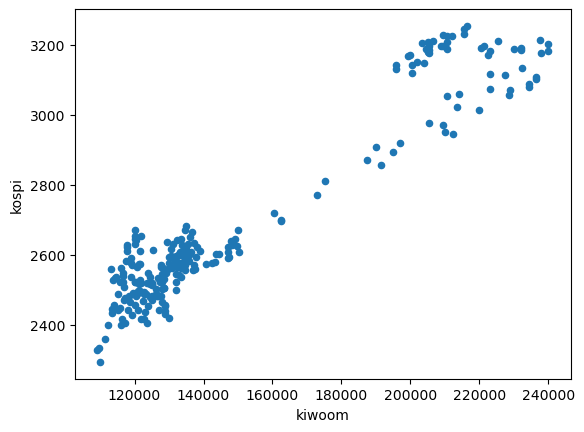

,kospi,kiwoom
kospi,1.000000,0.955651
kiwoom,0.955651,1.000000


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

kospi = pd.read_excel("data/코스피.xlsx")
kiwoom = pd.read_excel("data/키움증권.xlsx")

data = [kospi['종가'], kiwoom['종가']]
df = pd.concat(data, axis=1, keys=["kospi", 'kiwoom'])
df.head()

display(df.plot.scatter(x="kiwoom", y = 'kospi'))
plt.show()
df.corr()


In [57]:
import numpy as np
import pandas as pd
plt.rc("font", family="Malgun Gothic")

# ----- 샘플 전일/당일 시총 데이터 만들기 -----
np.random.seed(0)
codes_13 = [f"A{i:03d}" for i in range(1, 101)]          # 전일 100종목
codes_14 = codes_13 + ["A999"]                            # 당일 신규상장 1종목

def make_df(codes, with_new=False):
    n = len(codes)
    names = [f"종목{c[1:]}" for c in codes]
    shares = np.random.randint(10_000_000, 50_000_000, n)
    price_open = np.random.randint(1_000, 50_000, n)
    price_close = price_open + np.random.randint(-500, 500, n)
    if with_new:
        shares[-1] = 30_000_000                            # 신규 상장 주식수
        price_open[-1] = 20_000
        price_close[-1] = 21_000
    mcap = shares * price_close
    df = pd.DataFrame({
        "종목명": names, "시가": price_open, "종가": price_close,
        "상장주식수": shares, "시가총액": mcap
    }, index=codes)
    return df

df_13 = make_df(codes_13, with_new=False)
df_14 = make_df(codes_14, with_new=True)

display(df_13)
display(df_14)
# ----- TODO 8.1-1) 신규상장 종목 코드(전일엔 없고 당일엔 있는) 찾기 -----
idx_new = df_14.index.difference(df_13.index)
print("신규상장:", idx_new)

# ----- TODO 8.1-2) 신규상장만 반영한 '기준시가총액 스케일링'으로 당일기준시총 계산 -----
prev_comp_mcap = df_13["시가총액"].sum()           # 전일 비교·기준 동일
scale = (prev_comp_mcap + df_14.loc[idx_new, "시가총액"]) / prev_comp_mcap
today_base_mcap = ...
today_comp_mcap = df_14["시가총액"].sum()
print("당일 비교/기준 비율:", ...)

# ----- TODO 8.1-3) 동일 종목 집합의 '상장주식수 증가'(유상증자 등)를 반영해 재계산 -----
inter = df_14.index.intersection(df_13.index)
t13 = df_13.loc[inter]
t14 = df_14.loc[inter]
cond_inc = t14["상장주식수"] > t13["상장주식수"]
added_mcap = ...
scale2 = (prev_comp_mcap + df_14.loc[idx_new, "시가총액"] + added_mcap) / prev_comp_mcap
today_base_mcap2 = ...
print("증자 반영 후 비교/기준 비율:", ...)


,종목명,시가,종가,상장주식수,시가총액
A001,종목001,43947,43659,18325804,1222359780
A002,종목002,15254,14892,12215104,1518702336
A003,종목003,24700,24894,48712131,1459011642
A004,종목004,38073,37994,25039847,-2118792794
A005,종목005,39299,39436,17644169,30746732
...,...,...,...,...,...
A096,종목096,3775,3898,14987257,-1709214358
A097,종목097,19987,19578,33550050,-287117388
A098,종목098,31752,31593,33518782,-1898042386
A099,종목099,24563,24486,44415523,931770290


,종목명,시가,종가,상장주식수,시가총액
A001,종목001,20361,19976,24872209,-1368959352
A002,종목002,22875,22829,35789383,992038267
A003,종목003,37661,38026,47982482,-779240268
A004,종목004,3679,3607,42875356,32586436
A005,종목005,12187,12514,21819051,-1834302730
...,...,...,...,...,...
A097,종목097,25919,26149,32306145,-1335171707
A098,종목098,16456,16111,39387109,-1089446709
A099,종목099,7995,8191,46514489,-1251909945
A100,종목100,29954,29574,43075607,-1687285494


신규상장: Index(['A999'], dtype='object')


OverflowError: Python int too large to convert to C long